<a href="https://colab.research.google.com/github/Malathy-Lata/Hotel-booking-analysis/blob/main/S_Malathy_Lata_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Importing and mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Creating the hotel booking dataset from drive
filepath = '/content/drive/MyDrive/Colab Notebooks/EDA Capstone Project- 1/Hotel Bookings.csv'
hotel_booking_df = pd.read_csv(filepath)
# the first five rows of the dataset
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# the last five rows of the dataset
hotel_booking_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
hotel_booking_df.shape

(119390, 32)

In [ ]:
# Using .info() to understand the dataset
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_booking_df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


The dataset contains 32 columns and 119390 rows which consists of int64, float64, and object datatypes. It also contains null values for columns country, children, agent, and company. 

**Checking the unique values for various columns**

In [ ]:
hotel_booking_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
hotel_booking_df['is_canceled'].unique()

array([0, 1])

In [ ]:
hotel_booking_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
hotel_booking_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
hotel_booking_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
hotel_booking_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
hotel_booking_df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
hotel_booking_df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
hotel_booking_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
hotel_booking_df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

In [ ]:
hotel_booking_df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
hotel_booking_df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

# **Data Wrangling**

Before performing EDA data cleaning is crucial as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data the following steps are performed:

1) Handling missing values

2) Convert columns to appropriate datatypes

3) Adding important columns

**Handling missing values**

In [ ]:
# finding the missing values in all the columns
hotel_booking_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Replacing the missing values of various columns with appropriate values
hotel_booking_df.fillna({'country': 'others','children':0,'agent':0,'company':0},inplace = True)
hotel_booking_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**Converting to appropriate data types for required columns**

In [ ]:
# Converting the float type columns to integer type
hotel_booking_df[['children', 'company', 'agent', 'adr']] = hotel_booking_df[['children', 'company', 'agent', 'adr']].astype('int64')

# Changing the reservation date column to datatype datetime
hotel_booking_df['reservation_status_date'] = pd.to_datetime(hotel_booking_df['reservation_status_date'], format = '%Y-%m-%d')

**Adding appropriate columns using existing data**

In [ ]:
# Adding total stay days column in hotel booking dataset
hotel_booking_df['total_stay'] = hotel_booking_df['stays_in_weekend_nights']+hotel_booking_df['stays_in_week_nights']

# Adding total number of people as a column in hotel booking dataset by adding number of adults, children, and babies
hotel_booking_df['total_people'] = hotel_booking_df['adults']+hotel_booking_df['children']+hotel_booking_df['babies']

# Adding total kids as a column in hotel booking dataset by adding number of children, and babies
hotel_booking_df['total_kids'] = hotel_booking_df['children']+hotel_booking_df['babies']

There are rows with 0 number of total people (adults, kids, and babies), hence dropping the rows corresponding to these values.

In [ ]:
hotel_booking_df[hotel_booking_df['total_people']==0].shape

(180, 35)

In [ ]:
hotel_booking_df.drop(hotel_booking_df[hotel_booking_df['total_people']==0].index, inplace=True)

In [ ]:
hotel_booking_df.shape

(119210, 35)

In [ ]:
hotel_booking_df['total_people'].unique()

array([ 2,  1,  3,  4,  5, 12, 40, 26, 50, 27, 55, 20,  6, 10])

In [ ]:
# Using .info() to understand the dataset after performing the changes
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119210 non-null  int64  

# **EDA**

In [ ]:
# creating a dataframe of numerical values for analyzing correlation 
num_hotel_booking_df = hotel_booking_df[['is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','meal','country','market_segment','distribution_channel','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes','deposit_type','agent','days_in_waiting_list','customer_type','adr','required_car_parking_spaces','total_of_special_requests','reservation_status_date','total_stay','total_people']]

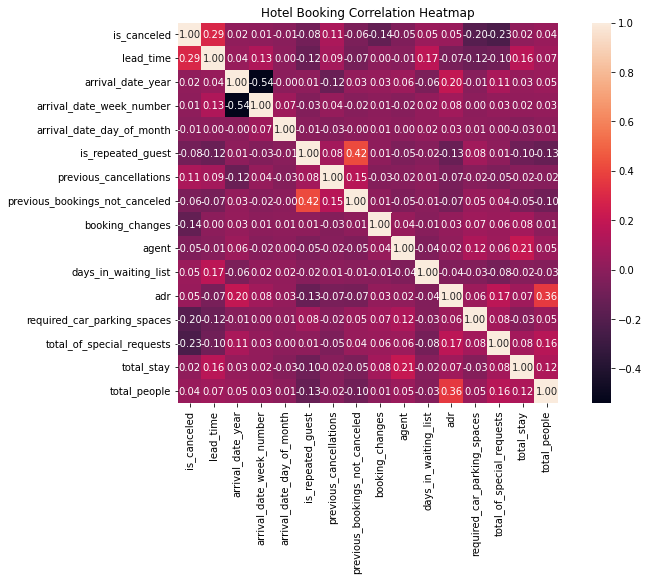

In [ ]:
#correlation matrix of hotel booking
corrmat = num_hotel_booking_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True);
plt.title('Hotel Booking Correlation Heatmap')
plt.show()

1) is_canceled and lead time have slight correlation. This means that the higher the lead time of the customer the higher is the cancellation rate.

2) is_repeated_guest and previous_bookings_not_canceled shows slight positive correlation as it is obvious that with no previous cancellations the guest would be a repeated one

3) adr is slightly correlated with total_people, which makes sense as more number of people means more revenue and therefore more adr.

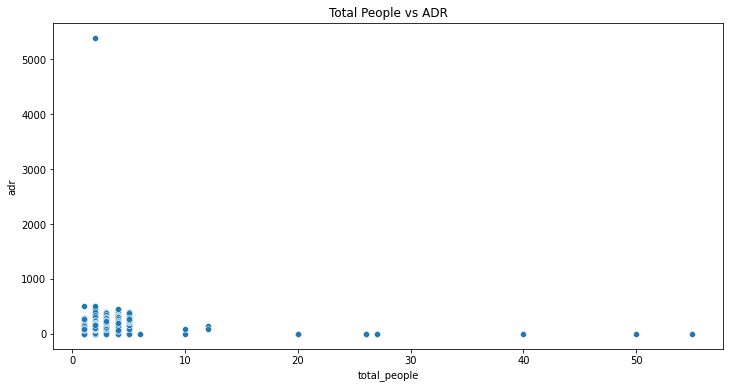

In [ ]:
# Scatter plot for adr vs total_people
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_people', data = hotel_booking_df)
plt.title('Total People vs ADR')
plt.show()

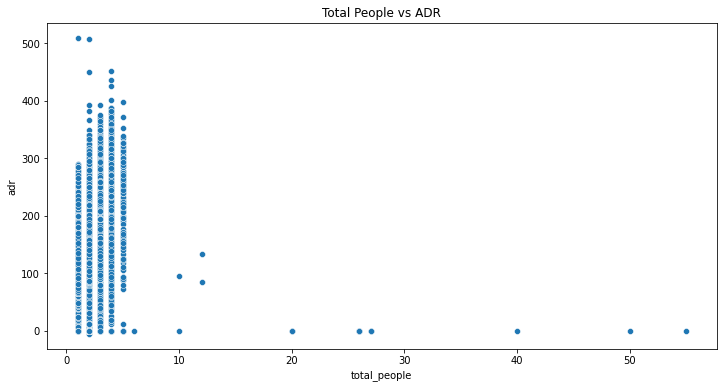

In [ ]:
# dropping the row containing the outlier adr
hotel_booking_df1 = hotel_booking_df.drop(hotel_booking_df[hotel_booking_df['adr'] > 5000].index, inplace = True)
# Scatter plot for adr vs total people
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_people', data = hotel_booking_df)
plt.title('Total People vs ADR')
plt.show()

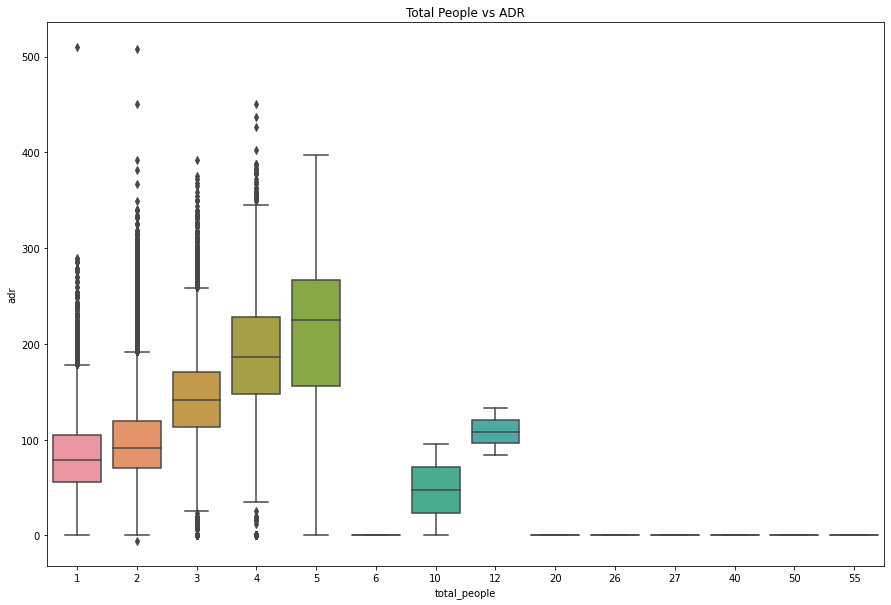

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x= 'total_people', y = 'adr', data = hotel_booking_df)
plt.title('Total People vs ADR')
plt.show()

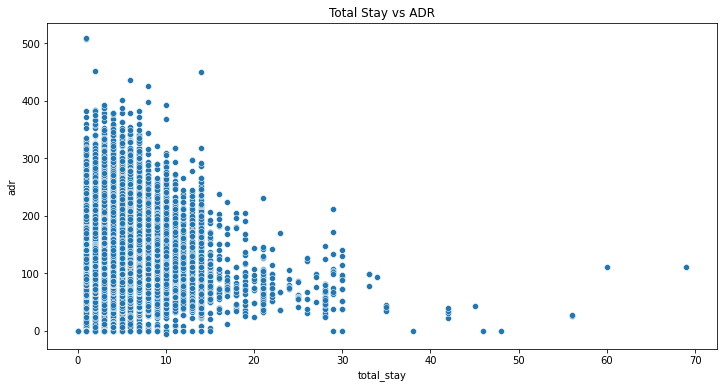

In [ ]:
# Scatter plot for adr vs total stay
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_booking_df)
plt.title('Total Stay vs ADR')
plt.show()

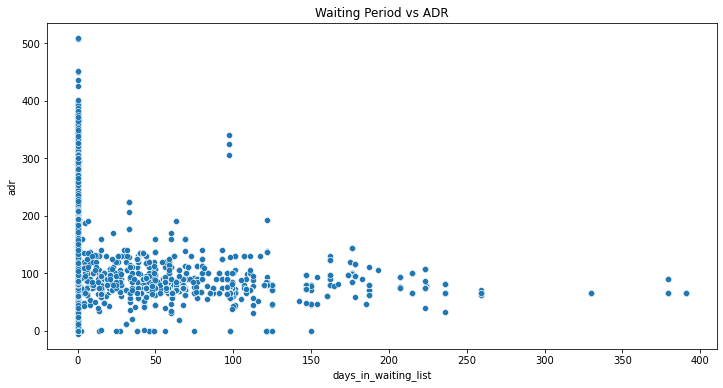

In [ ]:
# Scatter plot for adr vs days in waiting list
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'days_in_waiting_list', data = hotel_booking_df)
plt.title('Waiting Period vs ADR')
plt.show()

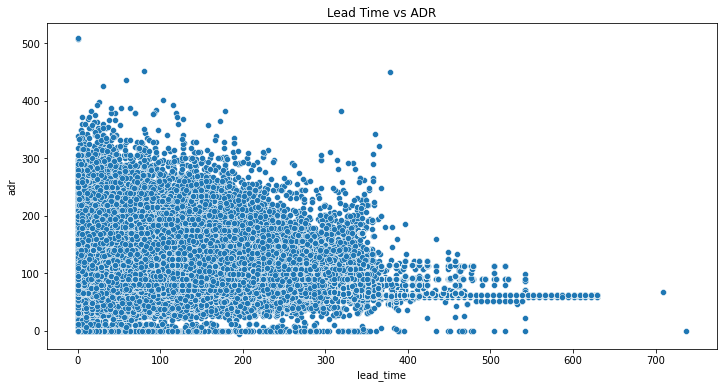

In [ ]:
# Scatter plot for adr vs lead time
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'lead_time', data = hotel_booking_df)
plt.title('Lead Time vs ADR')
plt.show()

From the above scatter plots it is evident that as total stay, total people, lead time, and waiting period increases the ADR decreases which means that the longer the stay, lead time, waiting period, and more the number of people, it would result in a better deal for the customers.

# **Univariate Analysis**

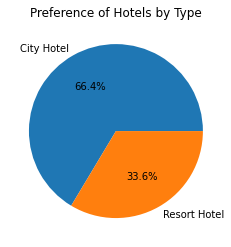

In [ ]:
# Analysing the % of preference by hotel type
hotels_df = pd.DataFrame(hotel_booking_df['hotel'].value_counts()).reset_index().rename(columns={'index' : 'Hotel name','hotel' : 'Total'})
plt.pie(hotels_df['Total'], labels= ('City Hotel','Resort Hotel'), autopct='%1.1f%%')
plt.title('Preference of Hotels by Type')
plt.show()

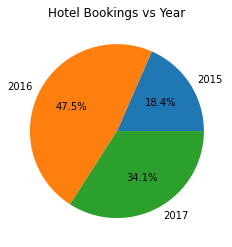

In [ ]:
# Grouping the data by arrival date year and analyzing the total hotel bookings
year_of_tourism_df = pd.DataFrame(hotel_booking_df.groupby(['arrival_date_year']).hotel.count()).reset_index().rename(columns={'hotel' : 'Total'})
Labels = year_of_tourism_df['arrival_date_year']
plt.pie(year_of_tourism_df['Total'], labels= Labels, autopct='%1.1f%%')
plt.title('Hotel Bookings vs Year')
plt.show()

City hotels and the year 2016 experienced the majority of bookings.

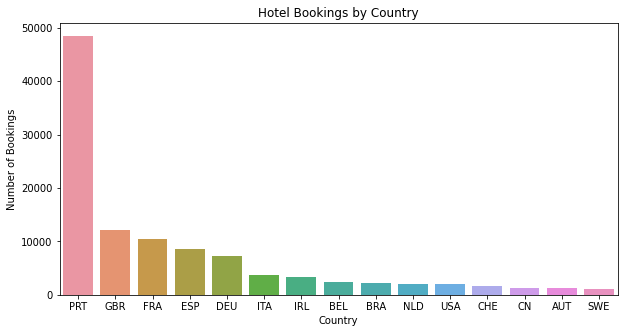

In [ ]:
# Analysing the % of preference by country
country_df = pd.DataFrame(hotel_booking_df['country'].value_counts()).reset_index().rename(columns={'index' : 'Country','country' : 'Number of Bookings'}).sort_values(by = 'Number of Bookings', ascending = False)
# Selecting the top 15 countries for hotel booking
country_df1 = country_df[:15]
plt.figure(figsize = (10,5))
plt.title('Hotel Bookings by Country')
sns.barplot(x = 'Country', y = 'Number of Bookings', data = country_df1)
plt.show()

Most of the bookings are from European countries and majorly from Portugal.

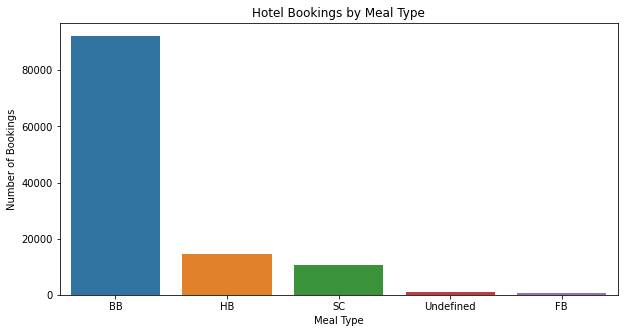

,Meal Type,Number of Bookings,%_preference
0,BB,92235,77.372514
1,HB,14458,12.128279
2,SC,10549,8.849164
3,Undefined,1169,0.980631
4,FB,798,0.669413


In [ ]:
# Analysing the % of preference by meal type
meal_type_df = pd.DataFrame(hotel_booking_df['meal'].value_counts()).reset_index().rename(columns={'index' : 'Meal Type','meal' : 'Number of Bookings'})
meal_type_df['%_preference']= ((meal_type_df['Number of Bookings']/hotel_booking_df['meal'].size)*100)
plt.figure(figsize = (10,5))
plt.title('Hotel Bookings by Meal Type')
sns.barplot(x = 'Meal Type', y = 'Number of Bookings', data = meal_type_df)
plt.show()
meal_type_df

BB is the most preferred meal type by the guests.

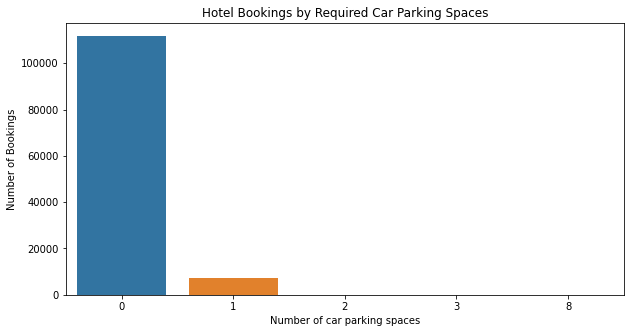

,Number of car parking spaces,Number of Bookings,%_preference
0,0,111800,93.784865
1,1,7376,6.187452
2,2,28,0.023488
3,3,3,0.002517
4,8,2,0.001678


In [ ]:
# Analysing the % of preference by required car parking spaces
required_car_parking_spaces_df = pd.DataFrame(hotel_booking_df['required_car_parking_spaces'].value_counts()).reset_index().rename(columns={'index' : 'Number of car parking spaces','required_car_parking_spaces' : 'Number of Bookings'})
required_car_parking_spaces_df['%_preference']= ((required_car_parking_spaces_df['Number of Bookings']/hotel_booking_df['required_car_parking_spaces'].size)*100)
plt.figure(figsize = (10,5))
plt.title('Hotel Bookings by Required Car Parking Spaces')
sns.barplot(x = 'Number of car parking spaces', y = 'Number of Bookings', data = required_car_parking_spaces_df)
plt.show()
required_car_parking_spaces_df

Majority of the bookings does not require any car parking spaces

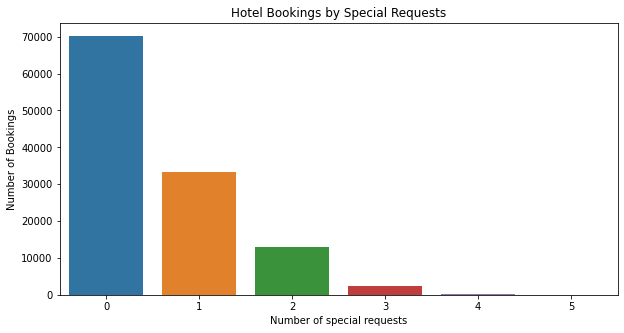

,Number of special requests,Number of Bookings,%_preference
0,0,70200,58.888171
1,1,33183,27.835986
2,2,12952,10.864951
3,3,2494,2.092124
4,4,340,0.285213
5,5,40,0.033555


In [ ]:
# Analysing the % of preference by special requests
total_of_special_requests_df = pd.DataFrame(hotel_booking_df['total_of_special_requests'].value_counts()).reset_index().rename(columns={'index' : 'Number of special requests','total_of_special_requests' : 'Number of Bookings'})
total_of_special_requests_df['%_preference']= ((total_of_special_requests_df['Number of Bookings']/hotel_booking_df['total_of_special_requests'].size)*100)
plt.figure(figsize = (10,5))
sns.barplot(x = 'Number of special requests', y = 'Number of Bookings', data = total_of_special_requests_df)
plt.title('Hotel Bookings by Special Requests')
plt.show()
total_of_special_requests_df

Greater than half of the bookings received special requests.

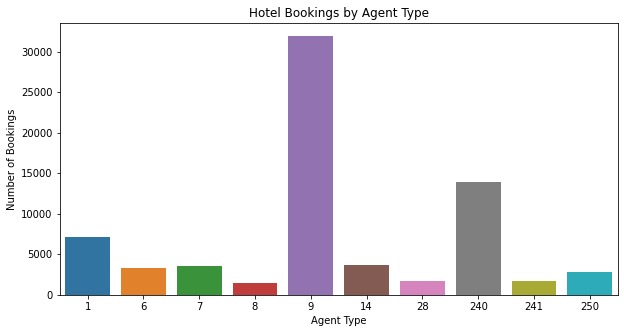

In [ ]:
# Analysing the % of preference by agent type
agent_df = pd.DataFrame(hotel_booking_df['agent'].value_counts()).reset_index().rename(columns={'index' : 'Agent Type','agent' : 'Number of Bookings'}).sort_values(by = 'Number of Bookings', ascending = False)
# Dropping the agent number 0 days from the dataset as it represents 'booking done with no agent involved' 
agent_df.drop(agent_df[agent_df['Agent Type']==0].index, inplace=True)
# Selecting the top 10 agents for hotel booking
agent_df1 = agent_df[:10]
plt.figure(figsize = (10,5))
plt.title('Hotel Bookings by Agent Type')
sns.barplot(x = 'Agent Type', y = 'Number of Bookings', data = agent_df1)
plt.show()

Agent no. 9 performed most number of bookings.

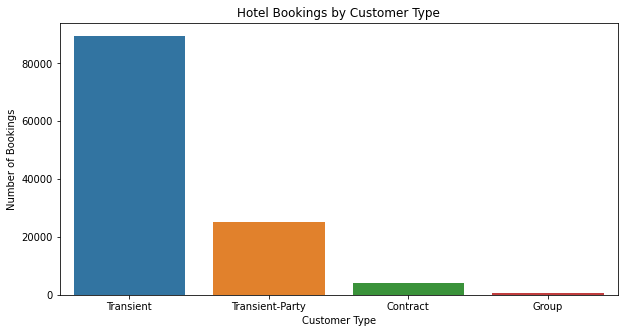

,Customer Type,Number of Bookings,%_preference
0,Transient,89475,75.057252
1,Transient-Party,25088,21.045391
2,Contract,4072,3.415849
3,Group,574,0.481507


In [ ]:
# Counting the number of bookings customer type wise
customer_type_df = pd.DataFrame(hotel_booking_df['customer_type'].value_counts()).reset_index().rename(columns={'index' : 'Customer Type','customer_type' : 'Number of Bookings'})
customer_type_df['%_preference']= ((customer_type_df['Number of Bookings']/hotel_booking_df['customer_type'].size)*100)
# Plotting a bar plot to analyze the % of hotel preference by customer type
plt.figure(figsize = (10,5))
plt.title('Hotel Bookings by Customer Type')
sns.barplot(x = 'Customer Type', y = 'Number of Bookings', data = customer_type_df)
plt.show()
customer_type_df

Almost 75% of the customers were transient.

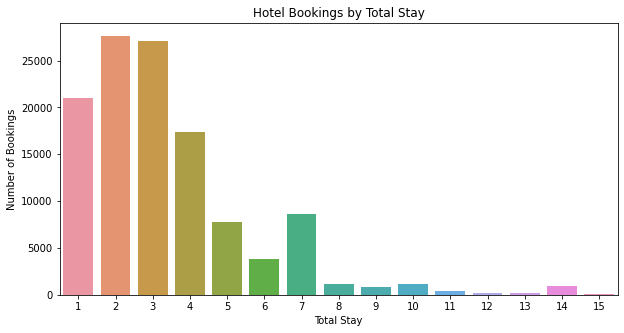

In [ ]:
# Analysing the % of preference by total stay type
total_stay_df = pd.DataFrame(hotel_booking_df['total_stay'].value_counts()).reset_index().rename(columns={'index' : 'Total Stay','total_stay' : 'Number of Bookings'}).sort_values(by='Total Stay')
# Dropping the total stay length of 0 days from the dataset as it represents the guests who did not check-in 
total_stay_df.drop(total_stay_df[total_stay_df['Total Stay']==0].index, inplace=True)
# Selecting the top 15 stay days for hotel booking
total_stay_df = total_stay_df[:15]
plt.figure(figsize = (10,5))
plt.title('Hotel Bookings by Total Stay')
sns.barplot(x = 'Total Stay', y = 'Number of Bookings', data = total_stay_df)
plt.show()


Stay length of <= 7 days consists of almost all of the bookings.

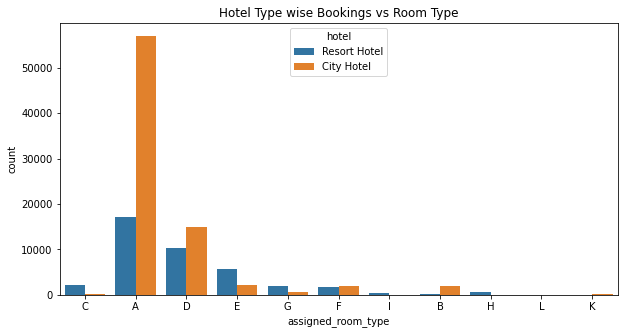

In [ ]:
# Analyzing the most preferred room type hotel-wise
plt.figure(figsize = (10,5))
sns.countplot(x = hotel_booking_df['assigned_room_type'], hue = hotel_booking_df['hotel'])
plt.title('Hotel Type wise Bookings vs Room Type')
plt.show()

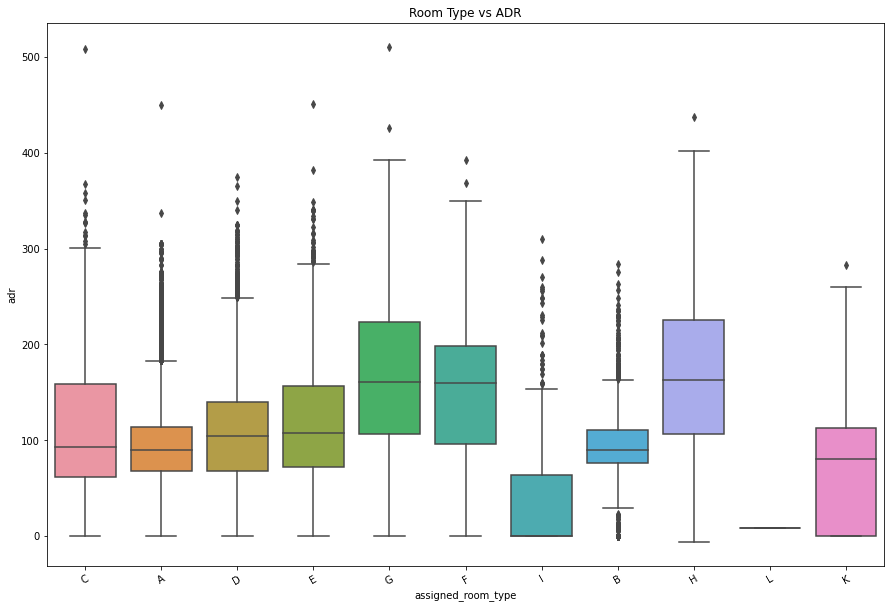

In [ ]:
# Analyzing the assigned room type by adr
hotel_booking_df.drop(hotel_booking_df[hotel_booking_df['adr']>5000].index, inplace=True)
plt.figure(figsize = (15,10))
sns.boxplot(x='assigned_room_type', y = 'adr', data = hotel_booking_df)
plt.title('Room Type vs ADR')
plt.xticks(rotation=30)
plt.show()

From the above two plots, it is obvious that most demand is for room type A. The better ADR generating room types are G, F, and H.

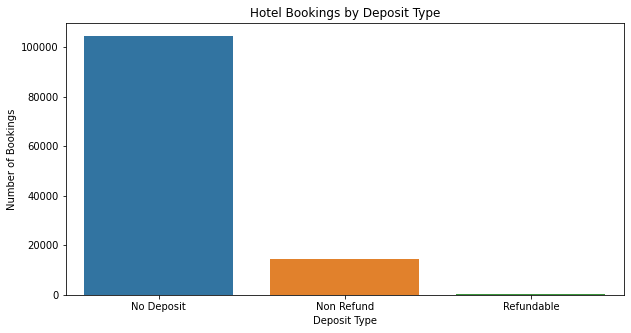

,Deposit Type,Number of Bookings,%_preference
0,No Deposit,104461,87.628451
1,Non Refund,14586,12.235653
2,Refundable,162,0.135896


In [ ]:
# Analysing the % of preference by deposit type
deposit_type_df = pd.DataFrame(hotel_booking_df['deposit_type'].value_counts()).reset_index().rename(columns={'index' : 'Deposit Type','deposit_type' : 'Number of Bookings'})
deposit_type_df['%_preference']= ((deposit_type_df['Number of Bookings']/hotel_booking_df['deposit_type'].size)*100)
plt.figure(figsize = (10,5))
plt.title('Hotel Bookings by Deposit Type')
sns.barplot(x = 'Deposit Type', y = 'Number of Bookings', data = deposit_type_df)
plt.show()
deposit_type_df

Most of the bookings made did not require any deposit.

# **Based on Hotel Type**

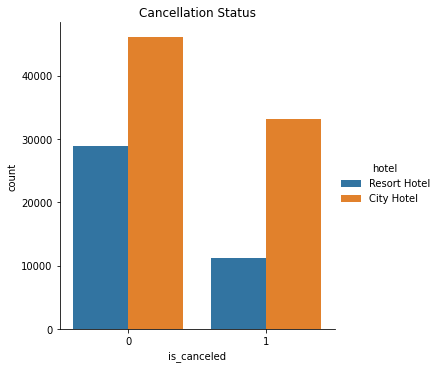

In [ ]:
# Counting the number of cancelled and not-cancelled bookings per hotel
sns.catplot(x='is_canceled', kind="count", hue="hotel", data= hotel_booking_df);
plt.title('Cancellation Status')
plt.show()

In [ ]:
#Grouping the data by cancelled bookings
is_cancelled_df1 = pd.DataFrame(hotel_booking_df[hotel_booking_df['is_canceled']==1])
is_canceled_df= pd.DataFrame(is_cancelled_df1.groupby(['hotel']).is_canceled.count())

#Calculating total % of cancellations hotel wise for total bookings
total_bookings = hotel_booking_df.groupby(['hotel']).size()
is_canceled_df = pd.concat([is_canceled_df,total_bookings], axis = 1).rename(columns={0:'Total Bookings'})
is_canceled_df['cancelled_%_total_bookings'] = round((is_canceled_df['is_canceled']/is_canceled_df['Total Bookings'])*100,0)

#Calculating total % of cancellations hotel wise for total cancellations
total_cancellation = is_canceled_df['is_canceled'].sum()
is_canceled_df['cancelled_%_total_cancellations'] = round((is_canceled_df['is_canceled']/total_cancellation)*100,0)
is_canceled_df

,is_canceled,Total Bookings,cancelled_%_total_bookings,cancelled_%_total_cancellations
hotel,,,,
City Hotel,33079,79163,42.0,75.0
Resort Hotel,11120,40047,28.0,25.0


Most of the canceled bookings are observed from city hotel type.

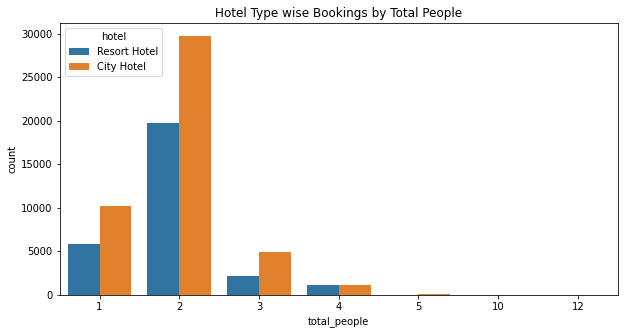

In [ ]:
# Analysing the hotel booking based on total number of people
# Selecting the not cancelled hotel bookings and the total people less than 50
not_canceled_df = hotel_booking_df[hotel_booking_df['is_canceled'] == 0]
total_people_df = not_canceled_df[not_canceled_df['total_people'] < 50]
plt.figure(figsize = (10,5))
sns.countplot(x = total_people_df['total_people'], hue = total_people_df['hotel'])
plt.title('Hotel Type wise Bookings by Total People')
plt.show()

Majority of the bookings were made by couple (2 people).

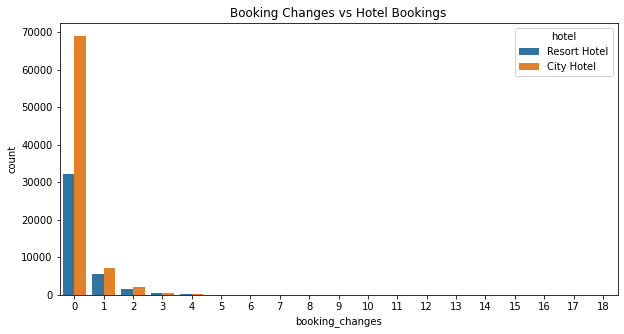

In [ ]:
# Analysing the booking changes by hotel type
plt.figure(figsize = (10,5))
sns.countplot(x = hotel_booking_df['booking_changes'], hue = hotel_booking_df['hotel'])
plt.title('Booking Changes vs Hotel Bookings')
plt.show()

Bookings changes were done for a minimal number of bookings for both the hotels.

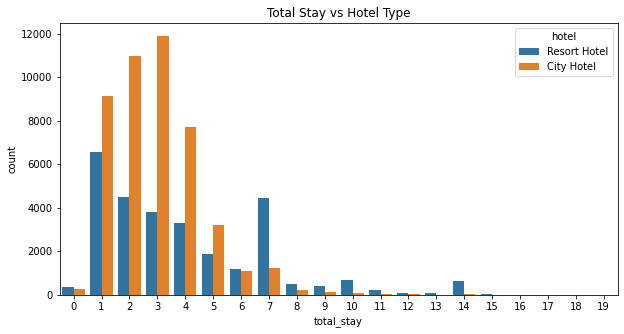

In [ ]:
# Selecting the total stay data less than 20 days
total_stay_df = not_canceled_df[not_canceled_df['total_stay'] < 20]
# Analysisng the preference of total stay per hotel type
plt.figure(figsize = (10,5))
sns.countplot(x = total_stay_df['total_stay'], hue = total_stay_df['hotel'])
plt.title('Total Stay vs Hotel Type')
plt.show()

For <= 5 days, city hotel has most number of bookings and for >= 7 days resort hotel has the most number of bookings. Thus resort hotel is preferred for longer stays.

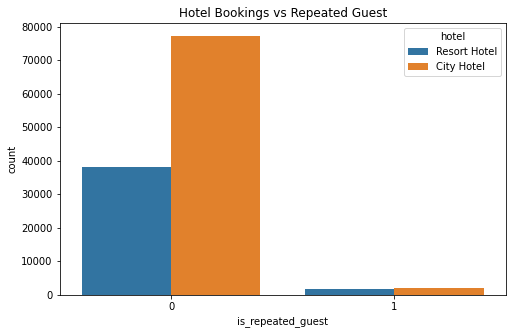

In [ ]:
# Plotting the hotel wise vs repeated guests data
plt.figure(figsize = (8,5))
sns.countplot(x = hotel_booking_df['is_repeated_guest'], hue = hotel_booking_df['hotel'])
plt.title('Hotel Bookings vs Repeated Guest')
plt.show()

In [ ]:
# Selecting the data corresponding to repeated guests
repeated_guest_df = hotel_booking_df.copy()
repeated_guest_df = repeated_guest_df[repeated_guest_df.is_repeated_guest==1]

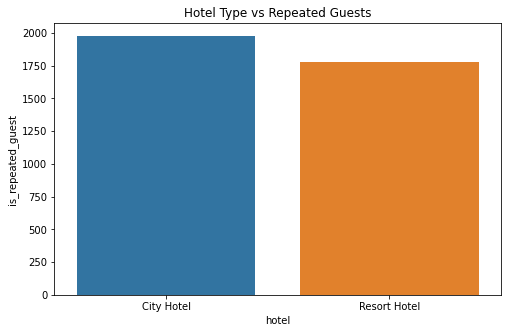

In [ ]:
# Grouping the repeated guest data by hotel wise
repeated_guest_hotel_df = repeated_guest_df.groupby(['hotel'])['is_repeated_guest'].count().reset_index().rename(columns = {0:'total_repeated_guests'})
plt.figure(figsize = (8,5))
sns.barplot(x = repeated_guest_hotel_df['hotel'], y = repeated_guest_hotel_df['is_repeated_guest'] )
plt.title('Hotel Type vs Repeated Guests')
plt.show()

City hotel has a slightly more number of bookings with repeated guests.

In [ ]:
# Understanding if most of the repeated guests requirements are such as special requests, booking changes, or amenities such as car parking spaces
df1 = repeated_guest_df.groupby(['is_repeated_guest','hotel'],as_index=False).agg({'required_car_parking_spaces':"mean",'total_of_special_requests':"mean",'booking_changes':"mean"})
df1

,is_repeated_guest,hotel,required_car_parking_spaces,total_of_special_requests,booking_changes
0,1,City Hotel,0.115326,0.634294,0.241275
1,1,Resort Hotel,0.227784,0.622047,0.291339


In [ ]:
df3 = repeated_guest_df.groupby(['is_repeated_guest','hotel'],as_index=False).agg({'required_car_parking_spaces':"median",'total_of_special_requests':"median",'booking_changes':"median"})
df3

,is_repeated_guest,hotel,required_car_parking_spaces,total_of_special_requests,booking_changes
0,1,City Hotel,0.0,0.0,0.0
1,1,Resort Hotel,0.0,0.0,0.0


In [ ]:
# Defining class for allocation of reserved or a different room type
def room_allocation(dataframe):
   if dataframe['reserved_room_type'] == dataframe['assigned_room_type']:
    return 1
   else:
    return 0

repeated_guest_df['same_room_allocated']= repeated_guest_df.apply(lambda x: room_allocation(x), axis =1)
hotel_booking_df['same_room_allocated']= hotel_booking_df.apply(lambda x: room_allocation(x), axis =1)

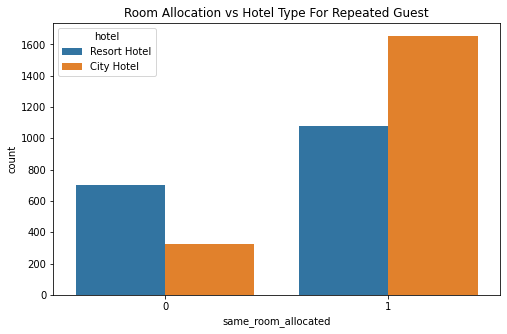

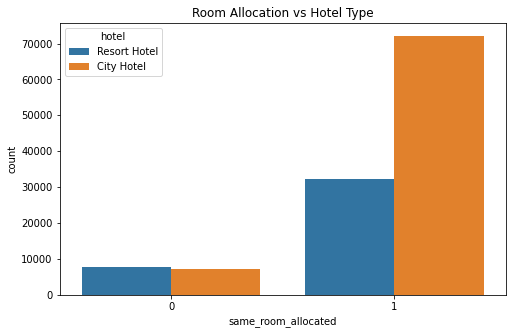

In [ ]:
# plotting room allocation vs hotel type for repeated guest
plt.figure(figsize = (8,5))
sns.countplot(x = repeated_guest_df['same_room_allocated'], hue = repeated_guest_df['hotel'])
plt.title('Room Allocation vs Hotel Type For Repeated Guest')
plt.show()
# plotting room allocation vs hotel type for all guests
plt.figure(figsize = (8,5))
sns.countplot(x = hotel_booking_df['same_room_allocated'], hue = hotel_booking_df['hotel'])
plt.title('Room Allocation vs Hotel Type')
plt.show()

For both the hotel types, it could be estimated that for most of the repeated guests the same room is allocated as they reserved. Hence this could be a reason for customer retention.

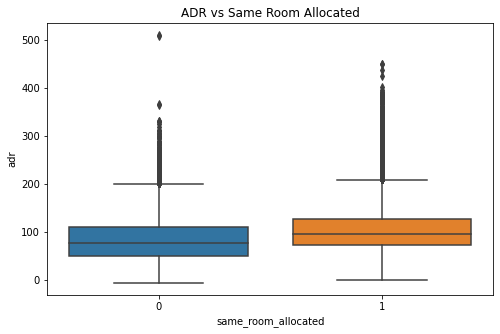

In [ ]:
# plotting room allocation vs adr
plt.figure(figsize = (8,5))
sns.boxplot(x = hotel_booking_df['same_room_allocated'], y = hotel_booking_df['adr'])
plt.title('ADR vs Same Room Allocated')
plt.show()

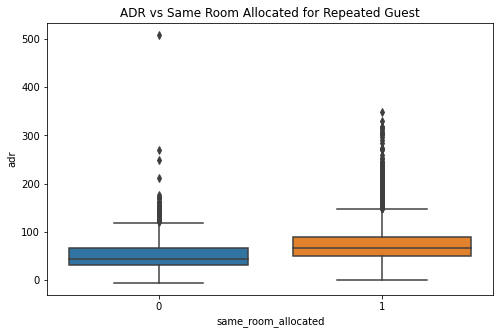

In [ ]:
# plotting room allocation vs adr for repeated guest
plt.figure(figsize = (8,5))
sns.boxplot(x = repeated_guest_df['same_room_allocated'], y = repeated_guest_df['adr'])
plt.title('ADR vs Same Room Allocated for Repeated Guest')
plt.show()

There is an higher average ADR for the bookings with allocation of same room type as reserved when compared to bookings with a different room type being allocated during arrival.

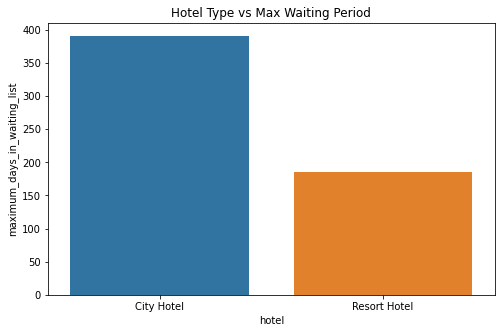

In [ ]:
# Grouping data by hotel type for maximum waiting period
days_in_waiting_list_df = hotel_booking_df.groupby(['hotel'])['days_in_waiting_list'].max().reset_index().rename(columns = {'days_in_waiting_list':'maximum_days_in_waiting_list'})
plt.figure(figsize = (8,5))
sns.barplot(x = days_in_waiting_list_df['hotel'], y = days_in_waiting_list_df['maximum_days_in_waiting_list'])
plt.title('Hotel Type vs Max Waiting Period')
plt.show()

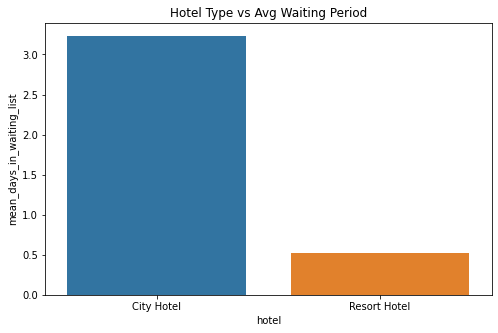

In [ ]:
# Grouping the data by hotel type for analysing average waiting period
days_in_waiting_list_df1 = hotel_booking_df.groupby(['hotel'])['days_in_waiting_list'].mean().reset_index().rename(columns = {'days_in_waiting_list':'mean_days_in_waiting_list'})
plt.figure(figsize = (8,5))
sns.barplot(x = days_in_waiting_list_df1['hotel'], y = days_in_waiting_list_df1['mean_days_in_waiting_list'])
plt.title('Hotel Type vs Avg Waiting Period')
plt.show()

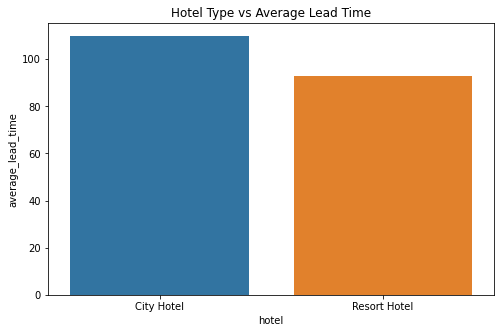

In [ ]:
# Grouping the data by hotel type and analysisng the average lead time
lead_time_df = hotel_booking_df.groupby(['hotel'])['lead_time'].mean().reset_index().rename(columns = {'lead_time':'average_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = lead_time_df['hotel'], y = lead_time_df['average_lead_time'])
plt.title('Hotel Type vs Average Lead Time')
plt.show()

City hotel has the greater maximum and average waiting period, and average lead time, through which it can be estimated that city hotel has more demand than resort hotel.

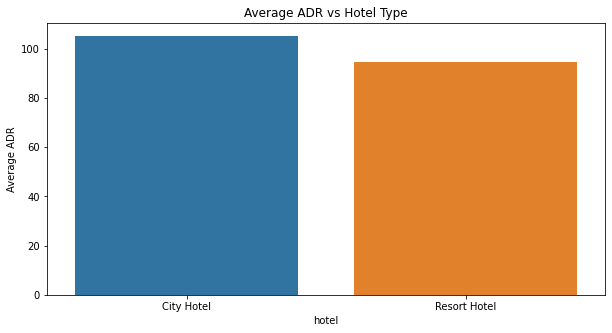

In [ ]:
# Grouping the data by hotel type and analysisng the average adr
adr_df = hotel_booking_df.groupby(['hotel'])['adr'].mean().reset_index().rename(columns = {'adr':'Average ADR'})
# Analysisng the adr per hotel type
plt.figure(figsize = (10,5))
sns.barplot(y = adr_df['Average ADR'], x = adr_df['hotel'])
plt.title('Average ADR vs Hotel Type')
plt.show()

The average ADR is greater for city hotel than the resort hotel. Thus it could be estimated that city hotel generates higher revenue than resort hotel.

# **Based on Market Segment**

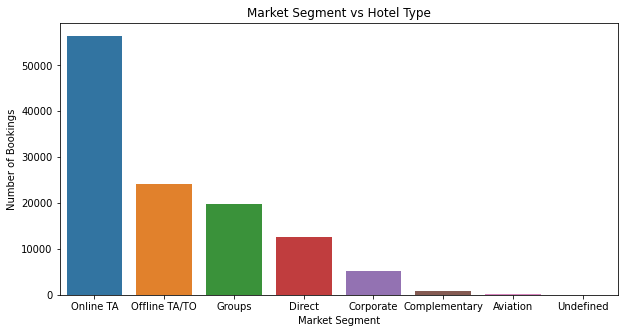

In [ ]:
# Analysing the % of preference by market segment type
market_segment_df = pd.DataFrame(hotel_booking_df['market_segment'].value_counts()).reset_index().rename(columns={'index' : 'Market Segment','market_segment' : 'Number of Bookings'})
plt.figure(figsize = (10,5))
plt.title('Market Segment vs Hotel Type')
sns.barplot(x = 'Market Segment', y = 'Number of Bookings', data = market_segment_df)
plt.show()

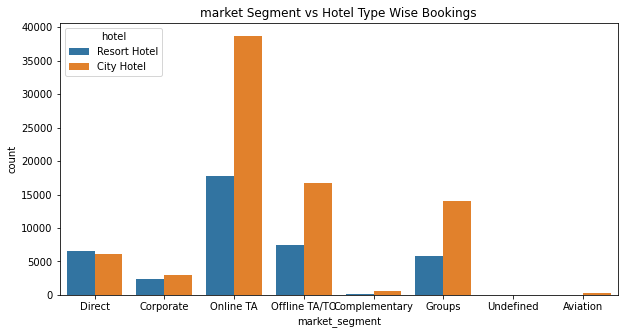

In [ ]:
# Analyzing the market segment hotel-wise
plt.figure(figsize = (10,5))
plt.title('market Segment vs Hotel Type Wise Bookings')
sns.countplot(x = hotel_booking_df['market_segment'], hue = hotel_booking_df['hotel'])
plt.show()

Online TA market segment witnessed the majority of the bookings.

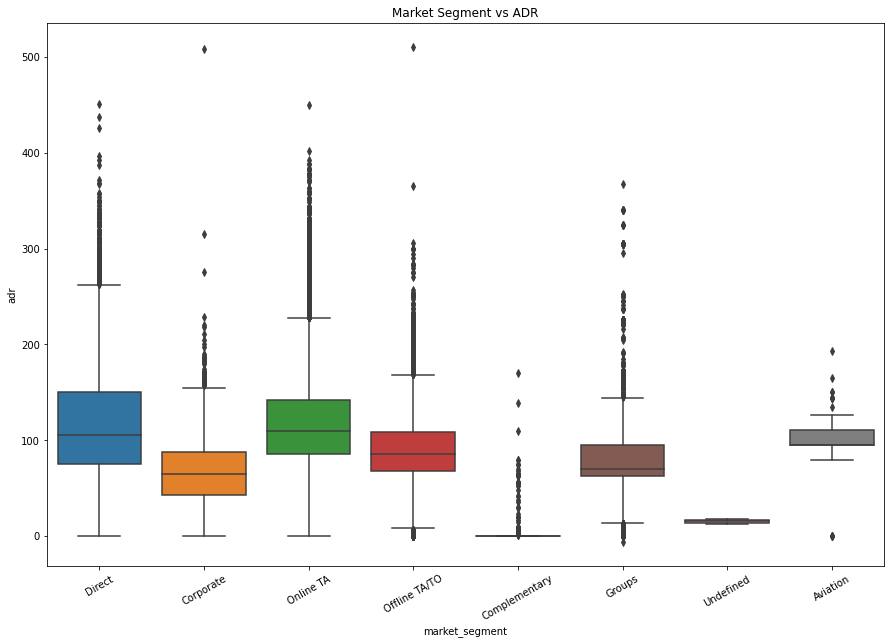

In [ ]:
# Dropping the row with outliers of adr
hotel_booking_df.drop(hotel_booking_df[hotel_booking_df['adr']>5000].index, inplace=True)
# Plotting box plot for market segment vs adr
plt.figure(figsize = (15,10))
sns.boxplot(x= 'market_segment', y = 'adr', data = hotel_booking_df)
plt.title('Market Segment vs ADR')
plt.xticks(rotation=30)
plt.show()

Direct and Online TA segments have the higher average ADR, thus are the revenue generating segments for hotel booking

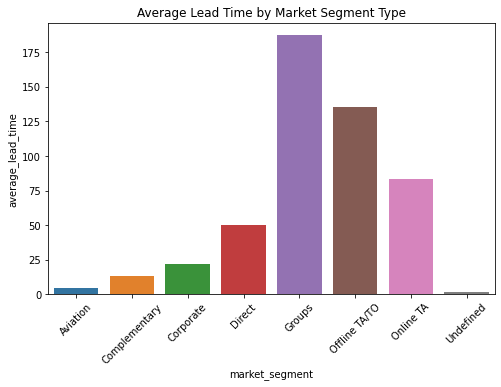

In [ ]:
# Grouping the data by market segment and analyzing the lead time
lead_time_ms_df = hotel_booking_df.groupby(['market_segment'])['lead_time'].mean().reset_index().rename(columns = {'lead_time':'average_lead_time'})
# plotting the market segment vs median lead time bar plot
plt.figure(figsize = (8,5))
sns.barplot(x = lead_time_ms_df['market_segment'], y = lead_time_ms_df['average_lead_time'] )
plt.title('Average Lead Time by Market Segment Type')
plt.xticks(rotation = 45)
plt.show()

The market segment groups, and offline TA/TO are the segments with the higher average lead time.

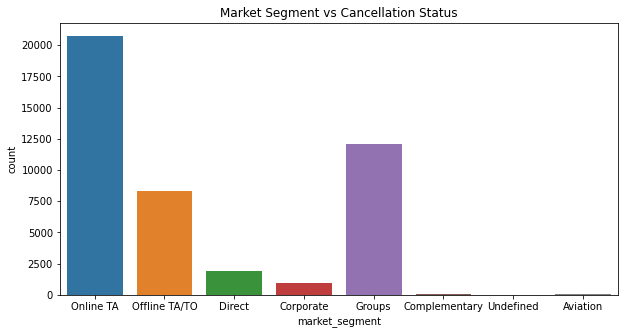

In [ ]:
# Selecting the cancelled bookings data
cancelled_df = pd.DataFrame(hotel_booking_df[hotel_booking_df['is_canceled']==1])
# Plotting Market segment vs Cancellations plot
plt.figure(figsize=(10,5))
sns.countplot(x = 'market_segment', data = cancelled_df)
plt.title('Market Segment vs Cancellation Status')
plt.show()

Online TA segment experienced the majority of the booking cancellations for both the hotels.

# **Based on Distribution Channel**

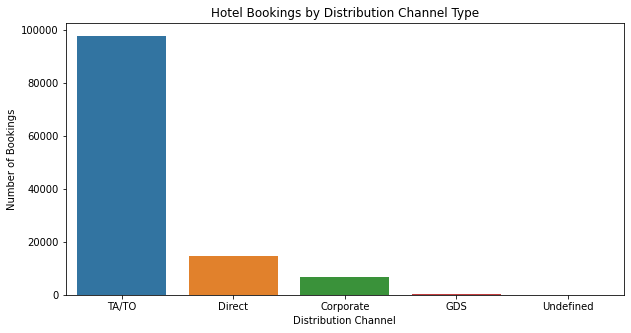

In [ ]:
# Analysing the % of hotel bookings by distribution channel type
distribution_channel_df = pd.DataFrame(hotel_booking_df['distribution_channel'].value_counts()).reset_index().rename(columns={'index' : 'Distribution Channel','distribution_channel' : 'Number of Bookings'})
plt.figure(figsize = (10,5))
plt.title('Hotel Bookings by Distribution Channel Type')
sns.barplot(x = 'Distribution Channel', y = 'Number of Bookings', data = distribution_channel_df)
plt.show()

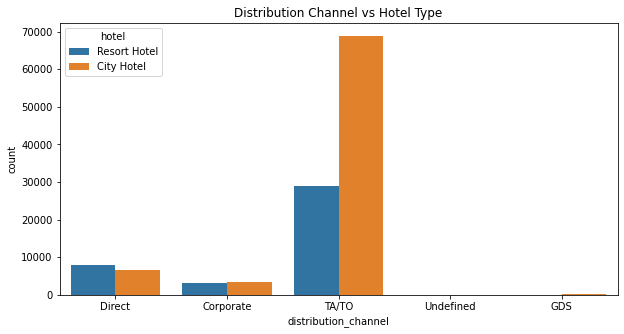

In [ ]:
# Analyzing the distribution channel hotel type-wise
plt.figure(figsize = (10,5))
plt.title('Distribution Channel vs Hotel Type')
sns.countplot(x = hotel_booking_df['distribution_channel'], hue = hotel_booking_df['hotel'])
plt.show()

For both the hotel types, TA/To is the channel with most number of bookings.

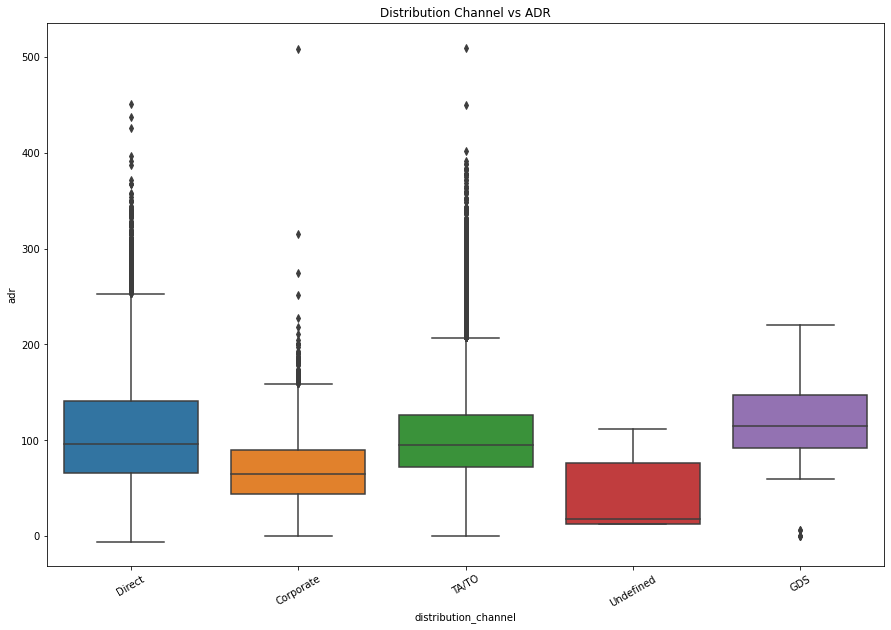

In [ ]:
# Using the hotel booking data by using the data with dropped adr outlier
hotel_booking_df.drop(hotel_booking_df[hotel_booking_df['adr']>5000].index, inplace=True)
#Plotting box plot for distribution channel vs adr
plt.figure(figsize = (15,10))
plt.title('Distribution Channel vs ADR')
sns.boxplot(x='distribution_channel', y = 'adr', data = hotel_booking_df)
plt.xticks(rotation=30)
plt.show()

Although, direct and TA/TO channels are generating good ADRs, GDS channel has the potential to increase the revenue with it's higher average ADR.

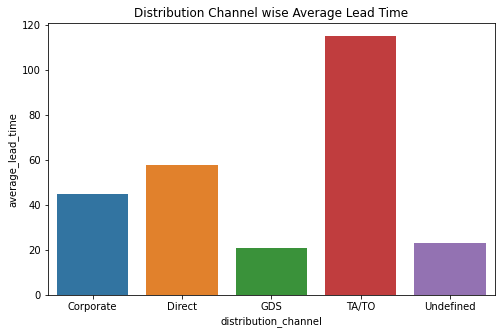

In [ ]:
# Grouping the data by distribution channel to analyze the lead time pattern across various distribution channels
lead_time_dc_df = hotel_booking_df.groupby(['distribution_channel'])['lead_time'].mean().reset_index().rename(columns = {'lead_time':'average_lead_time'})
# Plotting a bar plot for distribution channel vs lead time
plt.figure(figsize = (8,5))
plt.title('Distribution Channel wise Average Lead Time')
sns.barplot(x = lead_time_dc_df['distribution_channel'], y = lead_time_dc_df['average_lead_time'] )
plt.show()

Guests are booking way early by using the channel TA/TO

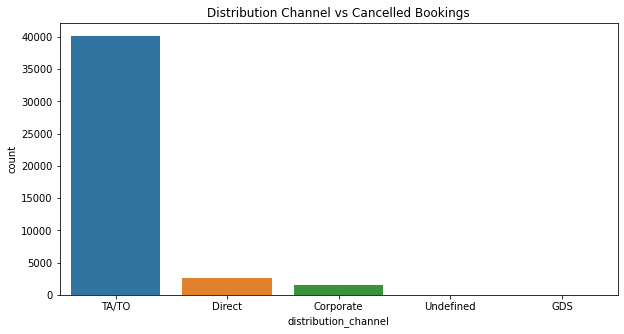

In [ ]:
# Selecting the cancelled bookings data
cancelled_df = pd.DataFrame(hotel_booking_df[hotel_booking_df['is_canceled']==1])
#Plotting a bar plot for distribution channel vs cancelled bookings
plt.figure(figsize=(10,5))
sns.countplot(x = 'distribution_channel', data = cancelled_df)
plt.title('Distribution Channel vs Cancelled Bookings')
plt.show()

TA/TO experienced a way ahead number of cancellations when compared to other channels of distribution

# **Based on Time**

**Hotel Bookings By Month**

In [ ]:
# Creating a month sequesnce for use in further data analysis
months = ['January', 'February', 'March','April','May','June','July','August','September','October','November','December']

In [ ]:
# Selecting data corresponding to hotel type- city hotel
city_hotel = hotel_booking_df[hotel_booking_df['hotel']=='City Hotel']
#Total number of bookings month wise for city hotel
seasonal_city_preference = city_hotel[['hotel','arrival_date_month']]
seasonal_city_preference.shape

(79162, 2)

In [ ]:
# Grouping the city hotel data by the arrival month
seasonal_city_preference = city_hotel['arrival_date_month'].value_counts()
seasonal_city_preference_df = pd.DataFrame(seasonal_city_preference).reset_index().rename(columns={'index':'Month' ,'arrival_date_month':'Number of Bookings'})
# Arranging the data month wise by using the already created sequence of months
seasonal_city_preference_df.index = pd.CategoricalIndex(seasonal_city_preference_df['Month'], categories=months, ordered=True)
seasonal_city_preference_df = seasonal_city_preference_df.sort_index().reset_index(drop=True).set_index('Month')

In [ ]:
# Selecting data corresponding to hotel type- resort hotel
resort_hotel = hotel_booking_df[hotel_booking_df['hotel']=='Resort Hotel']
# Total number of bookings month wise for resort hotel
seasonal_resort_preference = resort_hotel[['hotel','arrival_date_month']]
seasonal_resort_preference.shape

(40047, 2)

In [ ]:
# Grouping the resort hotel data by the arrival month
seasonal_resort_preference = resort_hotel['arrival_date_month'].value_counts()
seasonal_resort_preference_df = pd.DataFrame(seasonal_resort_preference).reset_index().rename(columns={'index':'Month' ,'arrival_date_month':'Number of Bookings'})
# Arranging the data month wise by using the already created sequence of months
seasonal_resort_preference_df.index = pd.CategoricalIndex(seasonal_resort_preference_df['Month'], categories=months, ordered=True)
seasonal_resort_preference_df = seasonal_resort_preference_df.sort_index().reset_index(drop=True).set_index('Month')

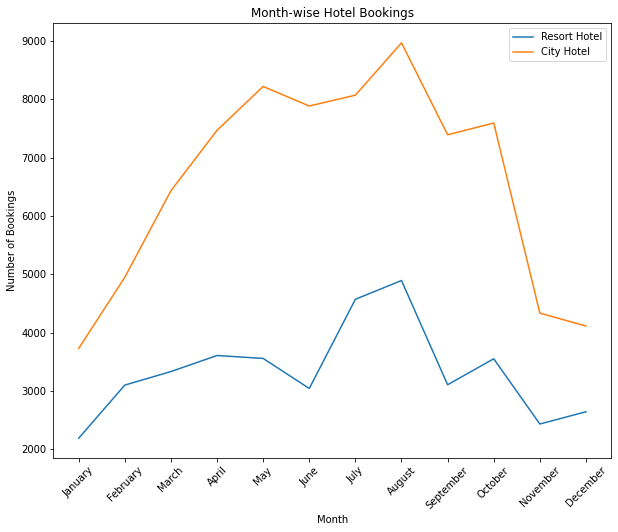

In [ ]:
# Plotting the month wise hotel bookings
plt.figure(figsize=(10,8))
plt.plot(seasonal_resort_preference_df, label = 'Resort Hotel')
plt.plot(seasonal_city_preference_df, label = 'City Hotel')
plt.title('Month-wise Hotel Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

Months July and August witnessed the most number of bookings. Thus August is the busiest month for hotel industry

**Month-wise ADR**

In [ ]:
# Grouping the city hotel data by arrival month and adr
city_adr_month = city_hotel.groupby(['arrival_date_month']).adr.median().round(2)
city_adr_month_df = pd.DataFrame(city_adr_month).reset_index().rename(columns={'arrival_date_month':'Month', 'adr':'ADR'})
# Arranging the data month wise by using the already created sequence of months
city_adr_month_df.index = pd.CategoricalIndex(city_adr_month_df['Month'], categories=months, ordered=True)
city_adr_month_df = city_adr_month_df.sort_index().reset_index(drop=True)
city_adr_month_df.set_index('Month', inplace=True)

In [ ]:
# Grouping the resort hotel data by arrival month and adr
resort_adr_month = resort_hotel.groupby(['arrival_date_month']).adr.median().round(2)
resort_adr_month_df = pd.DataFrame(resort_adr_month).reset_index().rename(columns={'arrival_date_month':'Month', 'adr':'ADR'})
# Arranging the data month wise by using the already created sequence of months
resort_adr_month_df.index = pd.CategoricalIndex(resort_adr_month_df['Month'], categories=months, ordered=True)
resort_adr_month_df = resort_adr_month_df.sort_index().reset_index(drop=True)
resort_adr_month_df.set_index('Month', inplace=True)

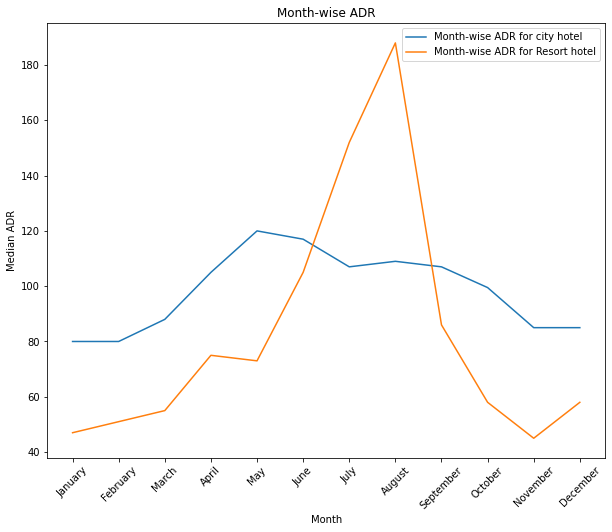

In [ ]:
# Plotting month wise median adr
plt.figure(figsize=(10,8))
plt.plot(city_adr_month_df, label = 'Month-wise ADR for city hotel')
plt.plot(resort_adr_month_df, label = 'Month-wise ADR for Resort hotel')
plt.title('Month-wise ADR')
plt.xlabel('Month')
plt.ylabel('Median ADR')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

The median ADR is higher in August for resort hotel and in May for city hotel.

**Date-wise Bookings**

In [ ]:
# Grouping the city hotel data by the arrival month
city_booking_days = city_hotel['arrival_date_day_of_month'].value_counts()
city_booking_days_df = pd.DataFrame((city_booking_days).reset_index().rename(columns={'index':'Date' ,'arrival_date_day_of_month':'Number of Bookings'}).sort_values('Date', ascending=True))
city_booking_days_df.set_index('Date', inplace=True)

In [ ]:
# Grouping the resort hotel data by the arrival date and hotel bookings
resort_booking_days = resort_hotel['arrival_date_day_of_month'].value_counts()
resort_booking_days_df = pd.DataFrame((resort_booking_days).reset_index().rename(columns={'index':'Date' ,'arrival_date_day_of_month':'Number of Bookings'}).sort_values('Date', ascending=True))
resort_booking_days_df.set_index('Date', inplace=True)

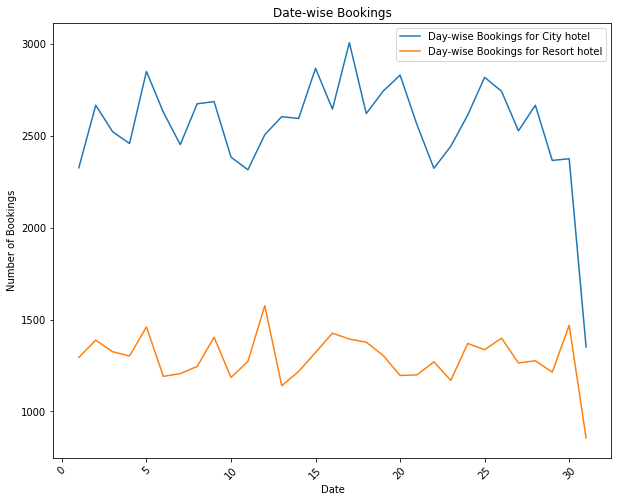

In [ ]:
# Plotting date wise bookings
plt.figure(figsize=(10,8))
plt.plot(city_booking_days_df, label = 'Day-wise Bookings for City hotel')
plt.plot(resort_booking_days_df, label = 'Day-wise Bookings for Resort hotel')
plt.title('Date-wise Bookings')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

The sudden peaks in bookings for both hotels could be due to the rise in number of bookings over weekends.

**Date-wise ADR**

In [ ]:
# Grouping the resort hotel data by the arrival date and adr
resort_adr_days = resort_hotel.groupby(['arrival_date_day_of_month']).adr.median().round(2)
resort_adr_days_df = pd.DataFrame(resort_adr_days).reset_index().rename(columns={'arrival_date_day_of_month':'Date', 'adr':'ADR'})
resort_adr_days_df.set_index('Date', inplace=True)

In [ ]:
# Grouping the city hotel data by the arrival date and adr
city_adr_days = city_hotel.groupby(['arrival_date_day_of_month']).adr.median().round(2)
city_adr_days_df = pd.DataFrame(city_adr_days).reset_index().rename(columns={'arrival_date_day_of_month':'Date', 'adr':'ADR'})
city_adr_days_df.set_index('Date', inplace=True)

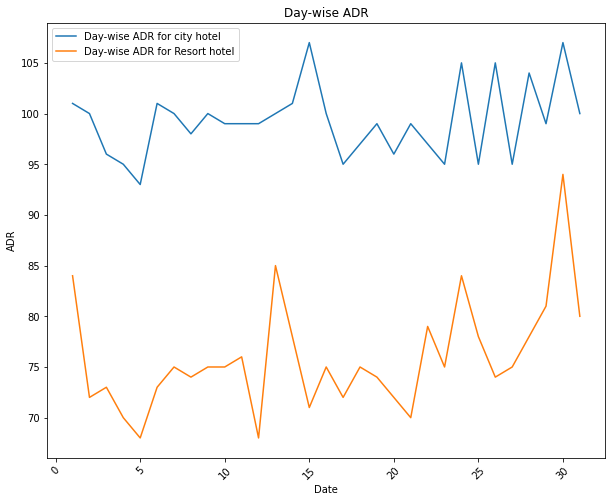

In [ ]:
# Plotting date wise median adr
plt.figure(figsize=(10,8))
plt.plot(city_adr_days_df, label = 'Day-wise ADR for city hotel')
plt.plot(resort_adr_days_df, label = 'Day-wise ADR for Resort hotel')
plt.title('Day-wise ADR')
plt.xlabel('Date')
plt.ylabel('ADR')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

The ADR is higher for both the hotels over month ends.

# **Based on Cancellation**

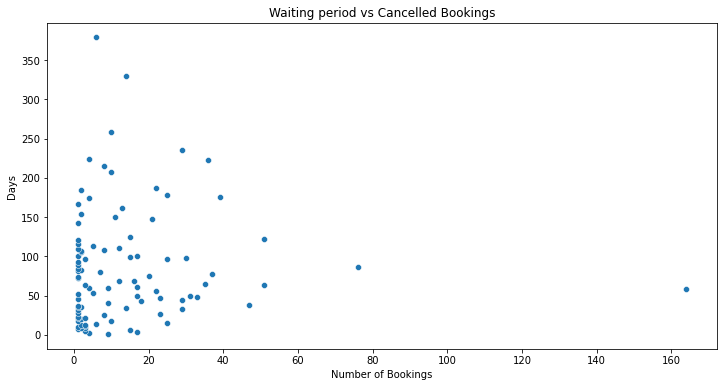

In [ ]:
# Selecting the data with waiting period by excluding the 0 waiting period rows
waiting_days_df = hotel_booking_df[hotel_booking_df['days_in_waiting_list']!=0]
# Selecting the non cancelled bookings with a certain waiting period
not_cancelled_waiting = waiting_days_df[waiting_days_df['is_canceled']==0]
# Analyzing the number of non cancelled bookings by waiting period
waiting_days_cancelation_df = pd.DataFrame(not_cancelled_waiting['days_in_waiting_list'].value_counts()).reset_index().rename(columns={'index' : 'Days','days_in_waiting_list' : 'Number of Bookings'}).sort_values(by = 'Days', ascending = True)
waiting_days_cancelation_df.set_index('Days', inplace = True)
# Scatter Plot for cancellation bookings vs waiting period
plt.figure(figsize = (12,6))
plt.title('Waiting period vs Cancelled Bookings')
sns.scatterplot(x = 'Number of Bookings', y = 'Days', data = waiting_days_cancelation_df)
plt.show()

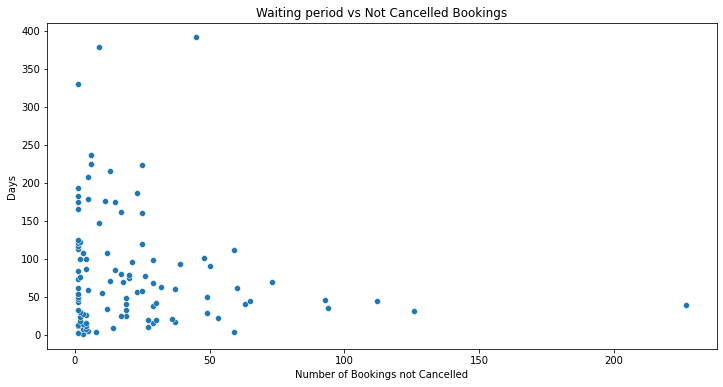

In [ ]:
# Selecting the cancelled bookings with a certain waiting period
is_cancelled_waiting = waiting_days_df[waiting_days_df['is_canceled']==1]
# Analyzing the number of cancelled bookings by waiting period
waiting_days_cancelation_df2 = pd.DataFrame(is_cancelled_waiting['days_in_waiting_list'].value_counts()).reset_index().rename(columns={'index' : 'Days','days_in_waiting_list' : 'Number of Bookings not Cancelled'}).sort_values(by = 'Days', ascending = True)
waiting_days_cancelation_df2.set_index('Days', inplace = True)
# Scatter Plot for not cancelled bookings vs waiting period
plt.figure(figsize = (12,6))
plt.title('Waiting period vs Not Cancelled Bookings')
sns.scatterplot(x = 'Number of Bookings not Cancelled', y = 'Days', data = waiting_days_cancelation_df2)
plt.show()

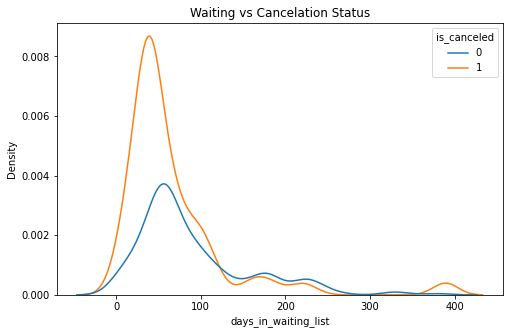

In [ ]:
#waiting period vs cancellation status
waiting_list_df = hotel_booking_df.copy()
# Dropping the rows with no waiting period
waiting_list_df.drop(waiting_list_df[waiting_list_df['days_in_waiting_list']==0].index, inplace=True)
plt.figure(figsize=(8,5))
sns.kdeplot(x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_list_df)
plt.title('Waiting vs Cancelation Status')
plt.show()

Both the canceled bookings and not canceled bookings curve are similar against the waiting period.

In [ ]:
# Selecting the data with certain lead time by excluding the 0 lead time rows
lead_time_df = hotel_booking_df[hotel_booking_df['lead_time']!=0]
# Selecting the non cancelled bookings with a certain lead time
not_cancelled_df = lead_time_df[lead_time_df['is_canceled']==0]
# Analysing the not cancelled bookings by grouping lead time wise
not_cancelled_lead_time_df = pd.DataFrame(not_cancelled_df['lead_time'].value_counts()).reset_index().rename(columns={'index' : 'Lead Time','lead_time' : 'Number of Bookings'}).sort_values(by = 'Lead Time', ascending = True)
not_cancelled_lead_time_df.set_index('Lead Time', inplace = True)

# Selecting the cancelled bookings with a certain lead time
cancelled_df = lead_time_df[lead_time_df['is_canceled']==1]
# Analysing the cancelled bookings by grouping lead time wise
cancelled_lead_time_df = pd.DataFrame(cancelled_df['lead_time'].value_counts()).reset_index().rename(columns={'index' : 'Lead Time','lead_time' : 'Number of Cancellations'}).sort_values(by = 'Lead Time', ascending = True)
cancelled_lead_time_df.set_index('Lead Time', inplace = True)

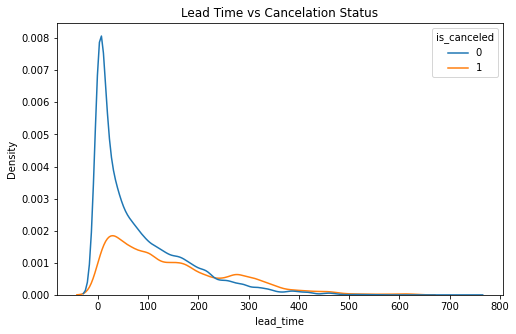

In [ ]:
# Understanding the density of canceled bookings by lead time
plt.figure(figsize=(8,5))
sns.kdeplot(x = 'lead_time', hue = 'is_canceled' , data = hotel_booking_df)
plt.title('Lead Time vs Cancelation Status')
plt.show()

Both the canceled bookings and not canceled bookings curve are similar against the lead time.

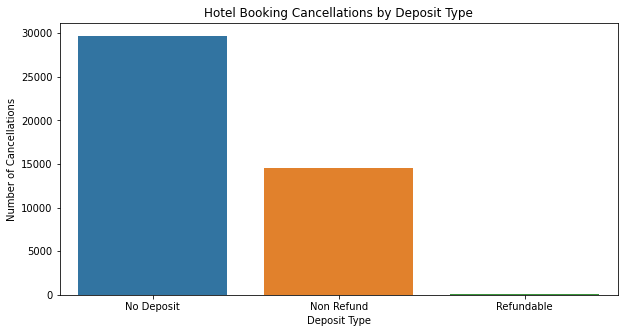

,Deposit Type,Number of Cancellations,%_cancellation
0,No Deposit,29669,67.127472
1,Non Refund,14493,32.791077
2,Refundable,36,0.081452


In [ ]:
# Analysing the % of cancellation by deposit type
deposit_type_cancellation_df = pd.DataFrame(is_cancelled_df1['deposit_type'].value_counts()).reset_index().rename(columns={'index' : 'Deposit Type','deposit_type' : 'Number of Cancellations'})
deposit_type_cancellation_df['%_cancellation']= ((deposit_type_cancellation_df['Number of Cancellations']/is_cancelled_df1['deposit_type'].size)*100)
# Ploting a bar plot for cancelled bookings by deposit type
plt.figure(figsize = (10,5))
plt.title('Hotel Booking Cancellations by Deposit Type')
sns.barplot(x = 'Deposit Type', y = 'Number of Cancellations', data = deposit_type_cancellation_df)
plt.show()
deposit_type_cancellation_df

In [ ]:
#Grouping the data by cancelled bookings
is_cancelled_df1 = pd.DataFrame(hotel_booking_df[hotel_booking_df['is_canceled']==1])
is_canceled_deposit_df= pd.DataFrame(is_cancelled_df1.groupby(['deposit_type']).is_canceled.count())

#Calculating total % of cancellations for deposit type total bookings
total_bookings = hotel_booking_df.groupby(['deposit_type']).size()
is_canceled_deposit_df = pd.concat([is_canceled_deposit_df,total_bookings], axis = 1).rename(columns={0:'Total Bookings'})
is_canceled_deposit_df['cancelled_%_deposit_type_bookings'] = round((is_canceled_deposit_df['is_canceled']/is_canceled_deposit_df['Total Bookings'])*100,0)

#Calculating total % of cancellations for deposit type total cancellations
total_deposit_cancellation = is_canceled_deposit_df['is_canceled'].sum()
is_canceled_deposit_df['cancelled_%_deposit_type_cancellations'] = round((is_canceled_deposit_df['is_canceled']/total_deposit_cancellation)*100,2)
is_canceled_deposit_df

,is_canceled,Total Bookings,cancelled_%_deposit_type_bookings,cancelled_%_deposit_type_cancellations
deposit_type,,,,
No Deposit,29669,104461,28.0,67.13
Non Refund,14494,14587,99.0,32.79
Refundable,36,162,22.0,0.08


Deposit type has no role to play in cancellation of bookings. Also, it is observed that for deposit type- non refundable almost 99% of the bookings were canceled. 

# **Based on Special Requests**

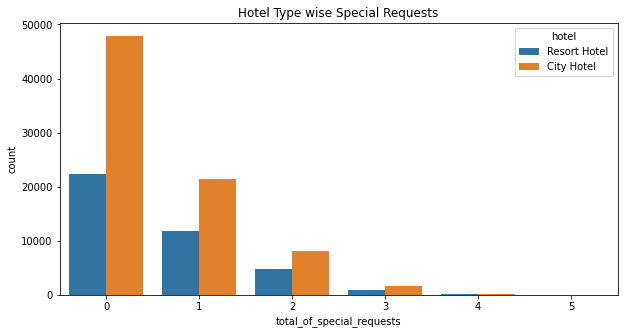

In [ ]:
# Plotting the pattern of total special requests by hotel type
plt.figure(figsize = (10,5))
sns.countplot(x = hotel_booking_df['total_of_special_requests'], hue = hotel_booking_df['hotel'])
plt.title('Hotel Type wise Special Requests')
plt.show()

Most of the bookings had no special requests tagged along.

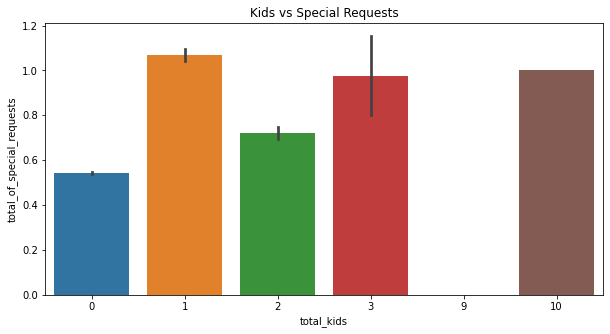

In [ ]:
# Plotting a bar plot to understand the pattern of special requests by kids
plt.figure(figsize=(10,5))
sns.barplot(x='total_kids', y='total_of_special_requests', data = hotel_booking_df)
plt.title('Kids vs Special Requests')
plt.show()

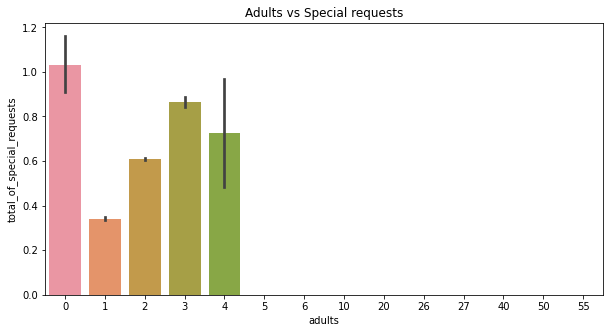

In [ ]:
# Plotting a bar plot to understand the pattern of special requests by adults
plt.figure(figsize=(10,5))
sns.barplot(x='adults', y='total_of_special_requests', data = hotel_booking_df)
plt.title('Adults vs Special requests')
plt.show()

Special requests are present in bookings with almost all of the bookings with presence of kids. Adults greater than 2 in a particular booking increased the chance of special requests.

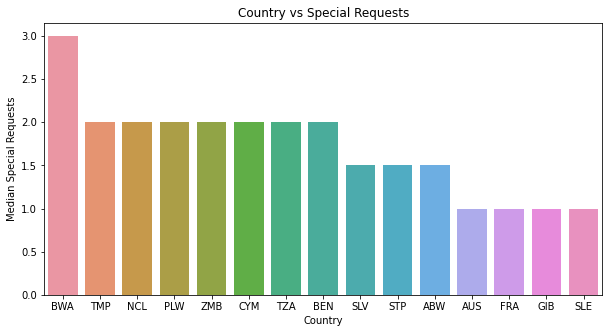

In [ ]:
# Grouping the data by country to understand the special requests trend from each country
country_special_request = pd.DataFrame(hotel_booking_df.groupby(['country']).total_of_special_requests.median().reset_index().rename(columns={'country':'Country','total_of_special_requests':'Median Special Requests'}).sort_values('Median Special Requests', ascending= False))
# Extracting the top 15 countries 
country_special_request_df = country_special_request[:15]
# Plotting the bar plot special requests vs country
plt.figure(figsize=(10,5))
sns.barplot(x='Country', y='Median Special Requests', data = country_special_request_df)
plt.title('Country vs Special Requests')
plt.show()

Most of the bookings with special requests are received from the African countries with an average of 3 requests.

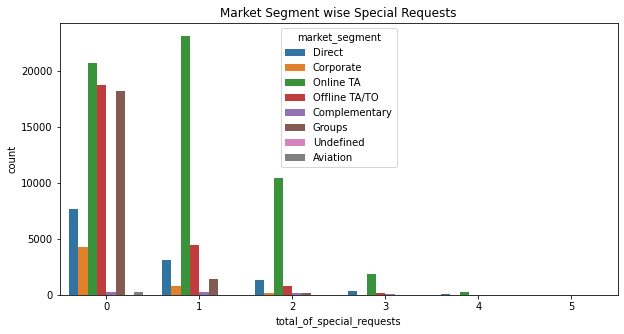

In [ ]:
# Plotting the pattern of total special requests by market segment
plt.figure(figsize = (10,5))
sns.countplot(x = hotel_booking_df['total_of_special_requests'], hue = hotel_booking_df['market_segment'])
plt.title('Market Segment wise Special Requests')
plt.show()

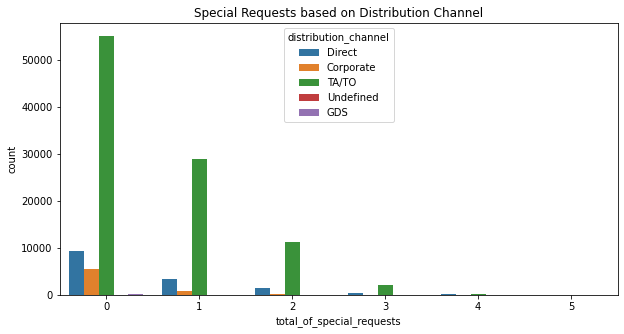

In [ ]:
# Plotting the pattern of total special requests by distribution channel
plt.figure(figsize = (10,5))
plt.title('Special Requests based on Distribution Channel')
sns.countplot(x = hotel_booking_df['total_of_special_requests'], hue = hotel_booking_df['distribution_channel'])
plt.show()

Bookings made through TA/TO (Offline and Online) channel has the majority of the bookings with special requests.

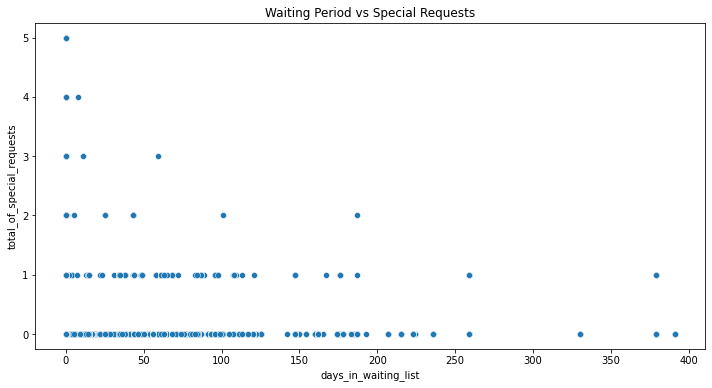

In [ ]:
# Plotting a scatter plot to understand if the waiting period plays a role in special requests
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'total_of_special_requests', x = 'days_in_waiting_list', data = hotel_booking_df)
plt.title('Waiting Period vs Special Requests')
plt.show()

Bookings with special requests are decreasing as the waiting period increases

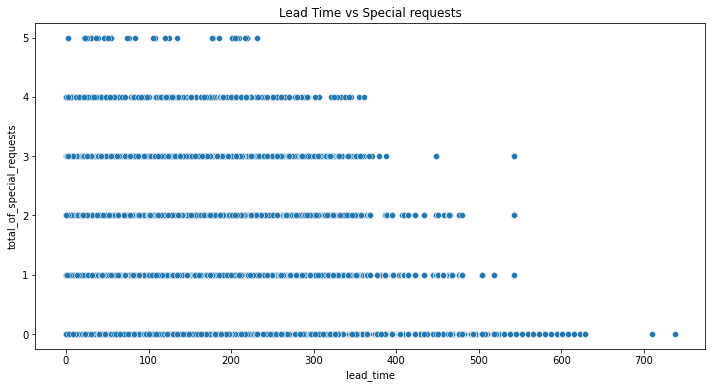

In [ ]:
# Plotting a scatter plot to understand if the lead time plays a role in special requests
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'total_of_special_requests', x = 'lead_time', data = hotel_booking_df)
plt.title('Lead Time vs Special requests')
plt.show()

Booking with special requests are decreasing as the lead time increases

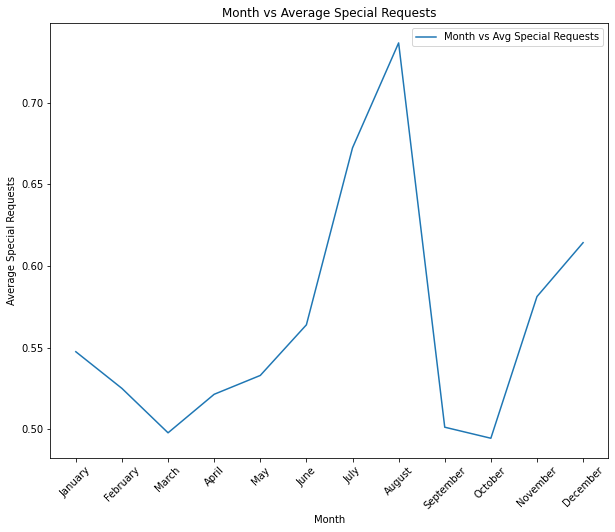

In [ ]:
# Month wise analysis of average special requests received
# Using groupby to understand the average special requests received per month across the dataset
month_special_requests = pd.DataFrame(hotel_booking_df.groupby(['arrival_date_month']).total_of_special_requests.mean())
month_special_requests_df = pd.DataFrame(month_special_requests).reset_index().rename(columns={'arrival_date_month':'Month' ,'total_of_special_requests':'Average of Special Requests'})
# Arranging the data month wise by using the already created sequence of months
month_special_requests_df.index = pd.CategoricalIndex(month_special_requests_df['Month'], categories=months, ordered=True)
month_special_requests_df = month_special_requests_df.sort_index().reset_index(drop=True).set_index('Month')
#Plotting the graph- month wise special requests for hotels
plt.figure(figsize=(10,8))
plt.plot(month_special_requests_df, label = 'Month vs Avg Special Requests')
plt.title('Month vs Average Special Requests')
plt.xlabel('Month')
plt.ylabel('Average Special Requests')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

The most busier month- August witnessed the majority of the bookings with special requests.